In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import norm, skew 

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

%matplotlib notebook
import matplotlib.pyplot as plt

In [74]:
%matplotlib inline

In [2]:
import os
print(os.getcwd())


C:\Users\Gracy\Python Courses\Python_ML_Projects\Wallmart salesforce prediction


In [3]:
print(os.listdir(os.getcwd()))

['.ipynb_checkpoints', 'sales_pred_1.ipynb', 'walmart-recruiting-store-sales-forecasting', 'walmart-recruiting-store-sales-forecasting.zip']


In [4]:
os.chdir('.\\walmart-recruiting-store-sales-forecasting')
features = pd.read_csv('features.csv')

In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106,False
1,1,2010-02-12,38.510,2.548,nan,nan,nan,nan,nan,211.242,8.106,True
2,1,2010-02-19,39.930,2.514,nan,nan,nan,nan,nan,211.289,8.106,False
3,1,2010-02-26,46.630,2.561,nan,nan,nan,nan,nan,211.320,8.106,False
4,1,2010-03-05,46.500,2.625,nan,nan,nan,nan,nan,211.350,8.106,False


features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [6]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.050,3.639,4842.290,975.030,3.000,2449.970,3169.690,nan,nan,False
8186,45,2013-07-05,77.500,3.614,9090.480,2268.580,582.740,5797.470,1514.930,nan,nan,False
8187,45,2013-07-12,79.370,3.614,3789.940,1827.310,85.720,744.840,2150.360,nan,nan,False
8188,45,2013-07-19,82.840,3.737,2961.490,1047.070,204.190,363.000,1059.460,nan,nan,False
8189,45,2013-07-26,76.060,3.804,212.020,851.730,2.060,10.880,1864.570,nan,nan,False


In [7]:
stores = pd.read_csv('stores.csv')

In [8]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

In [9]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week


In [10]:
train_df = pd.read_csv('train.csv')

In [11]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.500,False
1,1,1,2010-02-12,46039.490,True
2,1,1,2010-02-19,41595.550,False
3,1,1,2010-02-26,19403.540,False
4,1,1,2010-03-05,21827.900,False


In [12]:
train_df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [13]:
main_df = train_df.merge(stores, how = "left").merge(features, how="left")

In [14]:
main_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.500,False,A,151315,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106
1,1,1,2010-02-12,46039.490,True,A,151315,38.510,2.548,nan,nan,nan,nan,nan,211.242,8.106
2,1,1,2010-02-19,41595.550,False,A,151315,39.930,2.514,nan,nan,nan,nan,nan,211.289,8.106
3,1,1,2010-02-26,19403.540,False,A,151315,46.630,2.561,nan,nan,nan,nan,nan,211.320,8.106
4,1,1,2010-03-05,21827.900,False,A,151315,46.500,2.625,nan,nan,nan,nan,nan,211.350,8.106


In [15]:
main_df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,98,2012-09-28,508.370,False,B,118221,64.880,3.997,4556.610,20.640,1.500,1601.010,3288.250,192.014,8.684
421566,45,98,2012-10-05,628.100,False,B,118221,64.890,3.985,5046.740,nan,18.820,2253.430,2340.010,192.170,8.667
421567,45,98,2012-10-12,1061.020,False,B,118221,54.470,4.000,1956.280,nan,7.890,599.320,3990.540,192.327,8.667
421568,45,98,2012-10-19,760.010,False,B,118221,56.470,3.969,2004.020,nan,3.180,437.730,1537.490,192.331,8.667
421569,45,98,2012-10-26,1076.800,False,B,118221,58.850,3.882,4018.910,58.080,100.000,211.940,858.330,192.309,8.667


In [16]:
test_df = pd.read_csv('test.csv')

In [17]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [18]:
test_df.tail()

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [19]:
 test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


#Univariate analysis : histogram
#bivariate analysis : scatterplot
#multivariate analysis : heatmap

In [20]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [21]:
main_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.500,False,A,151315,42.310,2.572,nan,nan,nan,nan,nan,211.096,8.106
1,1,1,2010-02-12,46039.490,True,A,151315,38.510,2.548,nan,nan,nan,nan,nan,211.242,8.106
2,1,1,2010-02-19,41595.550,False,A,151315,39.930,2.514,nan,nan,nan,nan,nan,211.289,8.106
3,1,1,2010-02-26,19403.540,False,A,151315,46.630,2.561,nan,nan,nan,nan,nan,211.320,8.106
4,1,1,2010-03-05,21827.900,False,A,151315,46.500,2.625,nan,nan,nan,nan,nan,211.350,8.106
5,1,1,2010-03-12,21043.390,False,A,151315,57.790,2.667,nan,nan,nan,nan,nan,211.381,8.106
6,1,1,2010-03-19,22136.640,False,A,151315,54.580,2.720,nan,nan,nan,nan,nan,211.216,8.106
7,1,1,2010-03-26,26229.210,False,A,151315,51.450,2.732,nan,nan,nan,nan,nan,211.018,8.106
8,1,1,2010-04-02,57258.430,False,A,151315,62.270,2.719,nan,nan,nan,nan,nan,210.820,7.808
9,1,1,2010-04-09,42960.910,False,A,151315,65.860,2.770,nan,nan,nan,nan,nan,210.623,7.808


In [22]:
main_df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [23]:
main_df['Store'] = main_df['Store'].astype(str)
main_df['Dept'] = main_df['Dept'].astype(str)
main_df['Store.Dept'] = main_df['Store'].map(str) + "." + main_df['Dept']

In [24]:
main_df['Store'] = main_df['Store'].astype(int)
main_df['Dept'] = main_df['Dept'].astype(int)
main_df['Store.Dept'] = main_df['Store.Dept'].astype(float)

In [25]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int32
Dept            421570 non-null int32
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Store.Dept      421570 non-null float64
dtypes: bool(1), float64(11), int32(2), int64(1), object(2)
memory usage: 51.9+ MB


In [26]:
main_df['Store.Dept'].unique()

array([ 1.1 ,  1.2 ,  1.3 , ..., 45.96, 45.97, 45.98])

In [27]:
#Univariate Analysis
main_df['Weekly_Sales'].describe()

count   421570.000
mean     15981.258
std      22711.184
min      -4988.940
25%       2079.650
50%       7612.030
75%      20205.853
max     693099.360
Name: Weekly_Sales, dtype: float64

In [ ]:
def scatter_plot(main_df, column):
    plt.figure()
    plt.scatter(main_df[column], main_df['Weekly_Sales'])
    plt.xlabel(column)
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

In [ ]:
scatter_plot(main_df, 'Store')

In [ ]:
scatter_plot(main_df, 'Date')

In [ ]:
scatter_plot(main_df,'IsHoliday')

In [ ]:
scatter_plot(main_df,'Type')

In [ ]:

scatter_plot(main_df,'Size')

In [ ]:
scatter_plot(main_df,'Temperature')

In [ ]:
scatter_plot(main_df,'Fuel_Price')

In [ ]:
scatter_plot(main_df,'MarkDown1')

In [ ]:
scatter_plot(main_df,'CPI')

In [ ]:
scatter_plot(main_df,'Unemployment')

In [ ]:
scatter_plot(main_df,'Store.Dept')

In [ ]:
fig = plt.figure()
corr = main_df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [ ]:
#sns.pairplot(main_df, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment']);
sns.pairplot(main_df, x_vars=['Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'], y_vars='Weekly_Sales', size=7, aspect=0.7)

In [ ]:
sns.pairplot(main_df.fillna(0), x_vars=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], y_vars='Weekly_Sales', size=7, aspect=0.7, kind='reg')
#sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [28]:
main_df = pd.get_dummies(main_df, columns=['Type'])

In [29]:
main_df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = main_df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [30]:
main_df['Date'] = pd.to_datetime(main_df['Date'],format='%Y-%m-%d')

In [31]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
Store           421570 non-null int32
Dept            421570 non-null int32
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Store.Dept      421570 non-null float64
Type_A          421570 non-null uint8
Type_B          421570 non-null uint8
Type_C          421570 non-null uint8
dtypes: bool(1), datetime64[ns](1), float64(11), int32(2), int64(1), uint8(3)
memory usage: 49.9 MB


#Feature Selection

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [90]:
X = main_df.drop(['Weekly_Sales','Date'], axis=1)
y = main_df['Weekly_Sales']
Y = y.to_frame()

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int32
Dept            421570 non-null int32
IsHoliday       421570 non-null bool
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Store.Dept      421570 non-null float64
Type_A          421570 non-null uint8
Type_B          421570 non-null uint8
Type_C          421570 non-null uint8
dtypes: bool(1), float64(10), int32(2), int64(1), uint8(3)
memory usage: 43.4 MB


In [39]:
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:6,:])

ValueError: Input X must be non-negative.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
#print("Explained Variance: ") % fit.explained_variance_ratio_
print(fit.components_)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

In [ ]:
# instantiate and fit
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X, y)
feature_cols = main_df.columns
# print the coefficients
list(zip(feature_cols, lm2.coef_))

In [88]:
#X = main_df[['Store.Dept','Date','IsHoliday','MarkDown1','MarkDown2','MarkDown3','CPI','Type_A','Type_B','Type_C']]

In [89]:
X.head()

,Store.Dept,Date,IsHoliday,MarkDown1,MarkDown2,MarkDown3,CPI,Type_A,Type_B,Type_C
0,1.100,2010-02-05,False,0.000,0.000,0.000,211.096,1,0,0
1,1.100,2010-02-12,True,0.000,0.000,0.000,211.242,1,0,0
2,1.100,2010-02-19,False,0.000,0.000,0.000,211.289,1,0,0
3,1.100,2010-02-26,False,0.000,0.000,0.000,211.320,1,0,0
4,1.100,2010-03-05,False,0.000,0.000,0.000,211.350,1,0,0


In [95]:
import xgboost as xgb

In [96]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [97]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [98]:
xg_reg.fit(X,y)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [99]:
xg_reg.feature_importances_

array([0.10491803, 0.13770492, 0.00655738, 0.2       , 0.0295082 ,
       0.11147541, 0.00983607, 0.03606557, 0.01311475, 0.00327869,
       0.01967213, 0.1147541 , 0.        , 0.19344263, 0.00983607,
       0.00983607, 0.        ], dtype=float32)

In [105]:
 import matplotlib.pyplot as plt

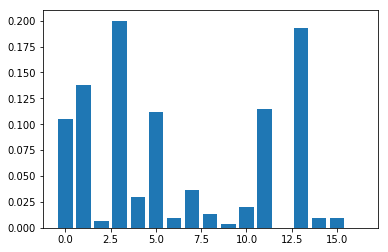

In [106]:
plt.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
plt.show()

In [58]:
#feat_imp = list(zip(X.columns, xg_reg.feature_importances_))

In [107]:
important_features_dict = {}
for x,i in enumerate(xg_reg.feature_importances_):
    important_features_dict[x]=i

important_features_list = sorted(important_features_dict, key=important_features_dict.get, reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [3, 13, 1, 11, 5, 0, 7, 4, 10, 8, 6, 14, 15, 2, 9, 12, 16]


In [71]:
#features_dict = dict(zip(np.argsort(xg_reg.feature_importances_),X.columns))
#features_dict
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int32
Dept            421570 non-null int32
IsHoliday       421570 non-null bool
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Store.Dept      421570 non-null float64
Type_A          421570 non-null uint8
Type_B          421570 non-null uint8
Type_C          421570 non-null uint8
dtypes: bool(1), float64(10), int32(2), int64(1), uint8(3)
memory usage: 43.4 MB


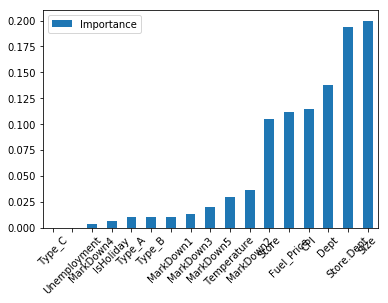

In [104]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, xg_reg.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance').plot(kind='bar', rot=45)

In [102]:
important_features = pd.Series(data=xg_reg.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

In [103]:
important_features

Size           0.200
Store.Dept     0.193
Dept           0.138
CPI            0.115
Fuel_Price     0.111
Store          0.105
MarkDown2      0.036
Temperature    0.030
MarkDown5      0.020
MarkDown3      0.013
MarkDown1      0.010
Type_B         0.010
Type_A         0.010
IsHoliday      0.007
MarkDown4      0.003
Unemployment   0.000
Type_C         0.000
dtype: float32

In [109]:
X = X.drop(columns=['Type_C','Unemployment','MarkDown4','IsHoliday','Type_A','Type_B','Store','Dept'])

In [110]:
X.columns

Index(['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown5', 'CPI', 'Store.Dept'],
      dtype='object')

In [111]:
X.head()

,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Store.Dept
0,151315,42.310,2.572,0.000,0.000,0.000,0.000,211.096,1.100
1,151315,38.510,2.548,0.000,0.000,0.000,0.000,211.242,1.100
2,151315,39.930,2.514,0.000,0.000,0.000,0.000,211.289,1.100
3,151315,46.630,2.561,0.000,0.000,0.000,0.000,211.320,1.100
4,151315,46.500,2.625,0.000,0.000,0.000,0.000,211.350,1.100


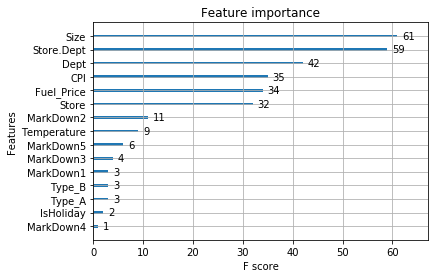

In [112]:
xgb.plot_importance(xg_reg)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
